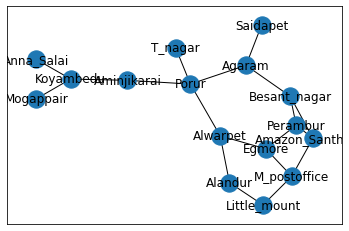

Path found: ['T_nagar', 'Porur', 'Aminjikarai', 'Koyembedu', 'Mogappair']


['T_nagar', 'Porur', 'Aminjikarai', 'Koyembedu', 'Mogappair']

In [3]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis
 
    def get_neighbors(self, v):
        return self.adjac_lis[v]
 
    def h(self, n):
        H = { 'Amazon_Santhome': 1, 'Besant_Nagar': 2, 'Perambur': 2, 'M_postoffice': 3, 'Agaram':4, 
        'Egmore':5, 
        'Little_mount':6, 
        'Saidapet':7, 
        'Alwarpet':8, 
        'Alandur':9, 
        'Porur':10, 
        'Alandur':11, 
        'Anna_Salai':12, 
        'T_nagar':13, 
        'Aminjikarai':14, 
        'Mogappair':15
        } 
        return H[n]
 
    def Weighted_a_star_algorithm(self, start, stop):
        # In this open_lst is a lisy of nodes which have been visited, but who's 
        # neighbours haven't all been always inspected, It starts off with the start 
  #node
        # And closed_lst is a list of nodes which have been visited
        # and who's neighbors have been always inspected
        open_lst = set([start])
        closed_lst = set([])
 
        # poo has present distances from start to all other nodes
        # the default value is +infinity
        poo = {}
        poo[start] = 0
 
        # par contains an adjac mapping of all nodes
        par = {}
        par[start] = start
 
        while len(open_lst) > 0:
            n = None
 
            # it will find a node with the lowest value of f() -
            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v
 
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop
            # then we start again from start
            if n == stop:
                reconst_path = []
 
                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]
 
                reconst_path.append(start)
 
                reconst_path.reverse()
 
                print('Path found: {}'.format(reconst_path))
                return reconst_path
 
            # for all the neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
              # if the current node is not presentin both open_lst and closed_lst
                # add it to open_lst and note n as it's par
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + 1.5*weight #Assigning 150% weights
 
                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update par data and poo data
                # and if the node was in the closed_lst, move it to open_lst
                else:
                    if poo[m] > poo[n] + 1.5*weight: 
                        poo[m] = poo[n] + 1.5*weight
                        par[m] = n
 
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
 
            # remove n from the open_lst, and add it to closed_lst
            # because all of his neighbors were inspected
            open_lst.remove(n)
            closed_lst.add(n)
 
        print('Path does not exist!')
        return None

adjac_lis = { 'Amazon_Santhome': [('Besant_Nagar', 1), ('Perambur', 3), ('M_postoffice', 7)], 
    'Besant_Nagar': [('Perambur', 5),('Agaram',7)], 
    'Perambur': [('Egmore', 12)], 
    'M_postoffice':[('Egmore',11),('Little_mount',5)], 
    'Agaram':[('Saidapet',6),('Porur',19)], 
    'Saidapet':[('Agaram',6)], 
    'Egmore':[('Alwarpet',21),('Little_mount',8)], 
    'Alandur':[('Alwarpet',10),('Little_mount',12)], 
    'Little_mount':[('Alandur',12)], 
    'Alwarpet':[('Porur',16),('Alandur',10)], 
    'Porur':[('T_nagar',13),('Aminjikarai',23)], 
    'Koyembedu':[('Anna_Salai',25),('Mogappair',29),('Aminjikarai',30)], 
    'Aminjikarai':[('Porur',23),('Koyembedu',30)],'T_nagar':[('Porur',13)],'Anna_Salai':[('Koyembedu',25)] 
}

class GraphVisualization: 
    def __init__(self): 
        self.visual = [] 
    def addEdge(self, a, b): 
        temp = [a, b] 
        self.visual.append(temp) 
    def visualize(self): 
        G = nx.Graph() 
        G.add_edges_from(self.visual) 
        nx.draw_networkx(G) 
        plt.show() 

G = GraphVisualization() 
G.addEdge('Amazon_Santhome', 'Besant_nagar') 
G.addEdge('Amazon_Santhome', 'Perambur') 
G.addEdge('Amazon_Santhome', 'M_postoffice') 
G.addEdge('Besant_nagar', 'Agaram') 
G.addEdge('Besant_nagar', 'Perambur') 
G.addEdge('Perambur', 'Egmore') 
G.addEdge('Agaram', 'Saidapet') 
G.addEdge('Agaram', 'Porur') 
G.addEdge('Alwarpet', 'Egmore') 
G.addEdge('Alwarpet', 'Alandur') 
G.addEdge('M_postoffice', 'Egmore') 
G.addEdge('Alandur', 'Little_mount') 
G.addEdge('Perambur', 'Egmore') 
G.addEdge('M_postoffice', 'Little_mount') 
G.addEdge('Alwarpet', 'Porur') 
G.addEdge('T_nagar', 'Porur') 
G.addEdge('Aminjikarai', 'Porur') 
G.addEdge('Aminjikarai', 'Koyambedu') 
G.addEdge('Aminjikarai', 'Porur') 
G.addEdge('Anna_Salai', 'Koyambedu') 
G.addEdge('Mogappair', 'Koyambedu') 
G.visualize()

graph1 = Graph(adjac_lis)
graph1.Weighted_a_star_algorithm('T_nagar','Mogappair') 